The `Radiation`class offers a simple interface for creating boxplots to compare different models, observational datasets, and variables.

As an example, we will plot the net long-wave and top net short-wave radiation fluxes at the top of the atmosphere for the IFS-NEMO historical experiment, comparing the results with ERA5 and CERES climatology.

In [1]:
from aqua import Reader
from aqua.diagnostics import Radiation

In [5]:
reader_ifs_nemo = Reader(model = 'IFS-NEMO', exp = 'historical-1990', source = 'lra-r100-monthly')
data_ifs_nemo = reader_ifs_nemo.retrieve()

reader_era5 = Reader(model="ERA5", exp="era5", source="monthly")
data_era5 = reader_era5.retrieve()

reader_ceres = Reader(model="CERES", exp="ebaf-toa41", source="monthly")
data_ceres = reader_ceres.retrieve()

2025-01-16 16:04:45 :: Reader :: WARNING  -> Issue found in data, removing ['level', 'idx_level'] coordinates
2025-01-16 16:04:48 :: Reader :: WARNING  -> Issue found in data, removing ['level', 'idx_level'] coordinates
2025-01-16 16:04:49 :: Reader :: WARNING  -> Issue found in area, removing ['time'] coordinates
2025-01-16 16:04:49 :: Reader :: WARNING  -> lat is sorted in different way between area files and your dataset. Flipping it!
2025-01-16 16:05:31 :: Reader :: WARNING  -> Issue found in area, removing ['time'] coordinates
2025-01-16 16:05:31 :: Reader :: WARNING  -> lat is sorted in different way between area files and your dataset. Flipping it!
2025-01-16 16:06:10 :: Reader :: WARNING  -> Issue found in area, removing ['time'] coordinates
2025-01-16 16:06:11 :: Reader :: WARNING  -> Issue found in area, removing ['time'] coordinates


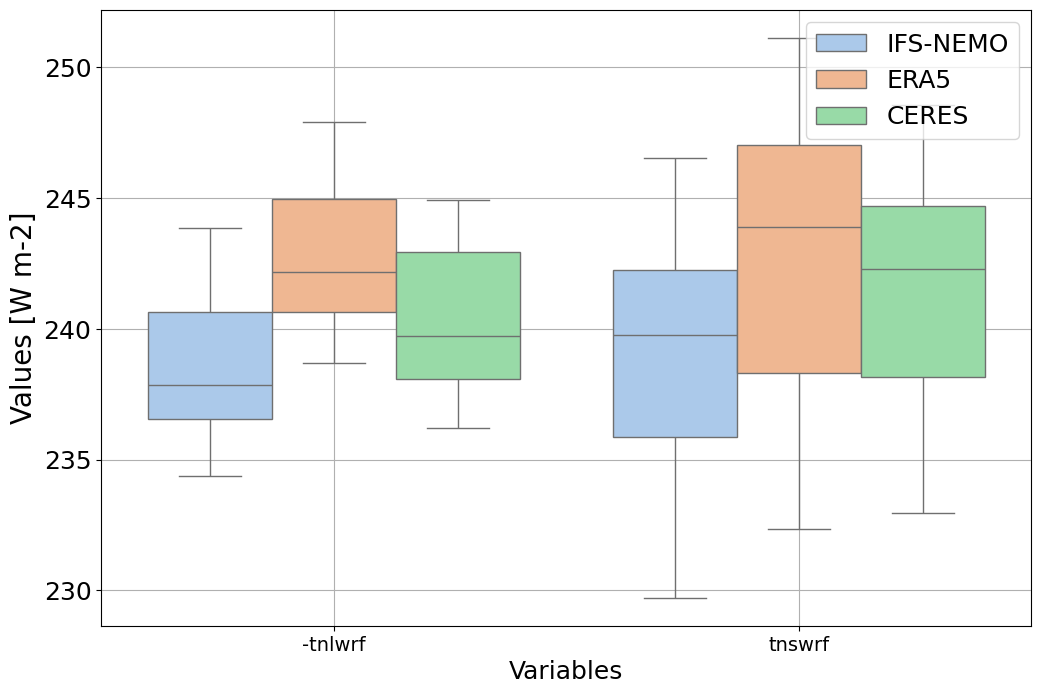

In [8]:
datasets = [data_ifs_nemo, data_era5, data_ceres]
model_names = ['IFS-NEMO', 'ERA5', 'CERES']
variables = ['-tnlwrf', 'tnswrf']

radiation = Radiation()
result = radiation.boxplot(datasets=datasets, model_names=model_names, variables=variables)